Chapter 6 Naive Bayes

reference : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ในตัวอย่างนี้จะทำการสร้างชุดข้อมูลฝึกฝนด้วย method make_blobs ของ scikit-learn ซึ่งจะทำการสร้างชุดข้อมูลที่มีลักษณะการกระจายตัวเเบบ การแจกแจงแบบปรกติหลายตัวแปร (multivariate normal distribution) 

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(1000, 2, centers=2, random_state=2, cluster_std=2.5)

ทดลองพล็อตผลที่ได้จากการสร้างชุดข้อมูล

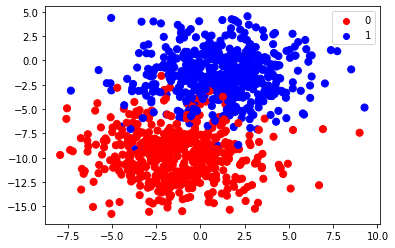

In [3]:
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

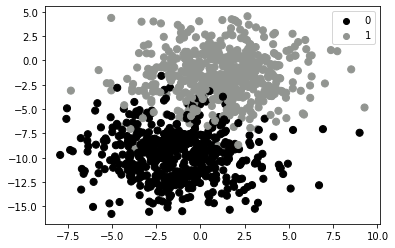

In [4]:
colors=np.array(["#000000", "#929591"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

In [5]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,1.606105,-5.178423,1
1,-1.226950,-7.204182,0
2,-0.244843,-12.038946,0
3,0.005917,-0.720965,1
4,3.817871,-1.587949,1


ทดลองเเสดงตัวอย่างข้อมูลเพื่อตรวจสอบข้อมูล

**สร้างแบบจำลองการเรียนรู้โดยใช้วิธี Naive Bayes Classifier**

นำเข้าคลาสของ GaussianNB เเละ train_test_split จาก scikit learn โดย

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [7]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=7)

สร้างแบบจำลอง Naive Bayes Classifier โดย

In [8]:
model=GaussianNB()
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า $R^2$

In [9]:
model.score(X_train, y_train)

0.96

In [ ]:
model.score(X_test, y_test)

ทดสอบประสิทธิภาพแบบจำลองด้วย cross validation

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.961 (0.019)


เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ

In [ ]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

ทดลองเเสดงผลการทำนายค่าด้วยแบบจำลองที่สร้างขึ้น

In [12]:
predicted = model.predict(X_test)

ทดลองเเสดงผลที่แบบจำลองทำนายผิดพลาด

In [13]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
9,1,0
28,0,1
29,0,1
36,1,0
67,1,0
81,1,0
124,1,0
158,1,0
201,0,1
212,0,1


**ตัวอย่างการใช้ Naive Bayes Classifer เเยกประเภทข้อมูลโดยใช้หลายคุณลักษณะ**

ตัวอย่างนี้ เเสดงการทำนายความสามารถในการชำระค่าบัตรเครดิตของบุคคลโดยพิจารณา 3 คุณลักษณะ ได้เเก่ รายได้(income) อายุ (age) เเละ จำนวนเงินกู้ยืม (loan) โดยใช้ข้อมูลจาก https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/credit_data.csv


In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/credit_data.csv')
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


เเบ่งข้อมูลสำหรับเรียนรู้เเละทดสอบ โดย

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["income","age","loan"]], 
    df[["default"]], 
    test_size=test_size, random_state=7)

สร้างแบบจำลอง

In [16]:
model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

ทดสอบประสิทธิภาพแบบจำลองด้วย cross validation

In [17]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.926 (0.012)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

ทดสอบทำนายผล

In [18]:
predicted = model.predict(X_test)


ทดลองเเสดงประสิทธิภาพ

In [ ]:
y_test

In [ ]:
predicted

In [19]:
from sklearn import metrics
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')
print(f'precision = {metrics.precision_score(y_test, predicted)}')
print(f'recall = {metrics.recall_score(y_test, predicted)}')

accuracy = 0.925
precision = 0.8088235294117647
recall = 0.632183908045977


แสดงประสิทธิภาพของเเบบจำลอง

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       513
           1       0.81      0.63      0.71        87

    accuracy                           0.93       600
   macro avg       0.87      0.80      0.83       600
weighted avg       0.92      0.93      0.92       600

